In [27]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from itertools import combinations

# Distribuição de Maxwell-Boltzmann

Vamos considerar partículas em uma caixa

In [14]:
n_particles = 16
r = np.random.random((2,n_particles))
# Colorir as partículas de cada lado
ixr = r[0]>0.5 #direita
ixl = r[0]<=0.5 #esquerda

Vamo dar um ID para cada partícula

In [15]:
ids = np.arange(n_particles)

Gráfico da configuração inicial

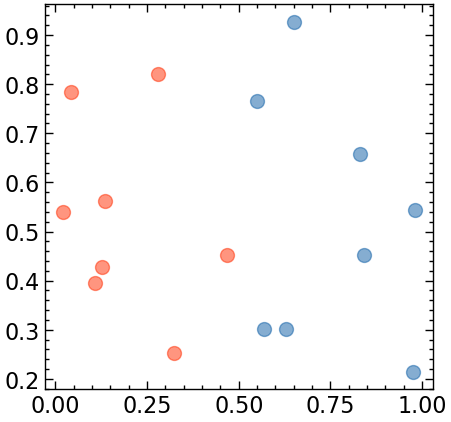

In [16]:
plt.figure(figsize=(5,5))
plt.plot(r[0][ixr],r[1][ixr],'o',color='C0',ms=10.0,alpha=0.5)
plt.plot(r[0][ixl],r[1][ixl],'o',color='C3',ms=10.0,alpha=0.5)

Velocidades das partículas

In [17]:
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500

## Pares de partículas

Para N partículas temos N*(N-1)/2 combinações possíveis de pares

In [18]:
ids_pairs = np.asarray(list(combinations(ids,2)))

Distância entre pares de partículas

In [19]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
x_pairs

array([[0.04361374, 0.5483704 ],
       [0.04361374, 0.28023445],
       [0.04361374, 0.97453328],
       [0.04361374, 0.56842782],
       [0.04361374, 0.13577354],
       [0.04361374, 0.10758872],
       [0.04361374, 0.98056639],
       [0.04361374, 0.01992942],
       [0.04361374, 0.62778383],
       [0.04361374, 0.46663458],
       [0.04361374, 0.65185212],
       [0.04361374, 0.84235648],
       [0.04361374, 0.12659656],
       [0.04361374, 0.32219527],
       [0.04361374, 0.83189128],
       [0.5483704 , 0.28023445],
       [0.5483704 , 0.97453328],
       [0.5483704 , 0.56842782],
       [0.5483704 , 0.13577354],
       [0.5483704 , 0.10758872],
       [0.5483704 , 0.98056639],
       [0.5483704 , 0.01992942],
       [0.5483704 , 0.62778383],
       [0.5483704 , 0.46663458],
       [0.5483704 , 0.65185212],
       [0.5483704 , 0.84235648],
       [0.5483704 , 0.12659656],
       [0.5483704 , 0.32219527],
       [0.5483704 , 0.83189128],
       [0.28023445, 0.97453328],
       [0.

Distância relativa na direção X

In [20]:
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dx_pairs

array([ 0.50475666,  0.23662071,  0.93091954,  0.52481408,  0.0921598 ,
        0.06397499,  0.93695265, -0.02368432,  0.58417009,  0.42302085,
        0.60823838,  0.79874274,  0.08298282,  0.27858154,  0.78827754,
       -0.26813595,  0.42616289,  0.02005742, -0.41259686, -0.44078167,
        0.43219599, -0.52844098,  0.07941343, -0.08173581,  0.10348172,
        0.29398609, -0.42177383, -0.22617512,  0.28352089,  0.69429883,
        0.28819337, -0.14446091, -0.17264572,  0.70033194, -0.26030503,
        0.34754938,  0.18640014,  0.37161767,  0.56212203, -0.15363789,
        0.04196082,  0.55165683, -0.40610546, -0.83875974, -0.86694456,
        0.00603311, -0.95460386, -0.34674945, -0.5078987 , -0.32268116,
       -0.1321768 , -0.84793672, -0.65233801, -0.142642  , -0.43265428,
       -0.4608391 ,  0.41213857, -0.5484984 ,  0.05935601, -0.10179324,
        0.0834243 ,  0.27392866, -0.44183126, -0.24623255,  0.26346346,
       -0.02818482,  0.84479285, -0.11584412,  0.49201029,  0.33

Distância total entre os pares

In [21]:
x_pairs = np.array([r[0][ids_pairs[:,0]], r[0][ids_pairs[:,1]]]).T
y_pairs = np.array([r[1][ids_pairs[:,0]], r[1][ids_pairs[:,1]]]).T
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dy_pairs = np.diff(y_pairs, axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dy_pairs**2)
d_pairs

array([0.50508897, 0.23954172, 1.09133639, 0.71260881, 0.24043397,
       0.39477467, 0.96750915, 0.24549852, 0.7573391 , 0.53757387,
       0.62487811, 0.86522946, 0.36570502, 0.59951428, 0.79840896,
       0.27384255, 0.69676866, 0.46417416, 0.46016367, 0.57628614,
       0.48629653, 0.57475333, 0.47041573, 0.32388536, 0.19186181,
       0.43035929, 0.54040128, 0.56022395, 0.30356179, 0.92213277,
       0.59395629, 0.29688186, 0.46044352, 0.7536861 , 0.38351558,
       0.62485185, 0.41342185, 0.38642583, 0.67291411, 0.42239257,
       0.56969935, 0.57554195, 0.41542602, 0.90789343, 0.88543539,
       0.32838642, 1.00847951, 0.35763906, 0.56083024, 0.7824441 ,
       0.27132332, 0.87437738, 0.65348536, 0.46518523, 0.50476169,
       0.47003139, 0.47734196, 0.59779157, 0.05935606, 0.18155847,
       0.63084368, 0.31204314, 0.45941718, 0.25102131, 0.44230129,
       0.16984144, 0.84501018, 0.11796784, 0.55644319, 0.34855767,
       0.63229036, 0.7151779 , 0.1344094 , 0.36069768, 0.70260

## Velocidade após colisão

$$\vec{v}_1^{\text{new}} = \vec{v}_1 - \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{r}_1 - \vec{r}_2)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_1 - \vec{r}_2)$$
$$\vec{v}_2^{\text{new}} = \vec{v}_2 - \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{r}_2 - \vec{r}_1)}{|\vec{r}_1 - \vec{r}_2|^2} (\vec{r}_2 - \vec{r}_1)$$

Teste se os pares irão colidir

In [22]:
radius = 0.06
ids_pairs_collide = ids_pairs[d_pairs < 2*radius]
ids_pairs_collide

array([[ 4,  9],
       [ 5,  8],
       [ 6, 13]])

Todas as partículas a esquerda são "1" e as da direita são "2"

In [23]:
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

Cálcula novas velocidades

In [24]:
v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)

## Simulação



In [25]:
def get_delta_pairs(x, ids_pairs):
    return np.diff(np.array([x[ids_pairs[:,0]], x[ids_pairs[:,1]]]).T, axis=1).ravel()

def get_deltad_pairs(r, ids_pairs):
    return np.sqrt(get_delta_pairs(r[0], ids_pairs)**2 + get_delta_pairs(r[1], ids_pairs)**2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - ((v1-v2)*(r1-r2)).sum(axis=0)/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros((ts, v.shape[0], v.shape[1]))
    # Initial State
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1,ts):
        ic = id_pairs[get_deltad_pairs(r, ids_pairs) < d_cutoff]
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])
        
        v[0,r[0]>1] = -np.abs(v[0,r[0]>1])
        v[0,r[0]<0] = np.abs(v[0,r[0]<0])
        v[1,r[1]>1] = -np.abs(v[1,r[1]>1])
        v[1,r[1]<0] = np.abs(v[1,r[1]<0])
        
        r = r + v*dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

Define  raio da partícula e evolui a posição de todas elas (`rs` tem informações $(t,x,y)$)

In [29]:
radius = 0.03
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

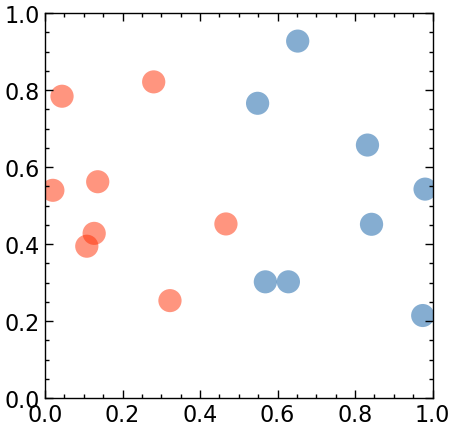

In [30]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
xred, yred = rs[0][0][ixr], rs[0][1][ixr]
xblue, yblue = rs[0][0][ixl],rs[0][1][ixl]
circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
cred = matplotlib.collections.PatchCollection(circles_red, facecolors='C0',alpha = 0.5)
cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='C3',alpha = 0.5)
ax.add_collection(cred)
ax.add_collection(cblue)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

Fazendo uma animação

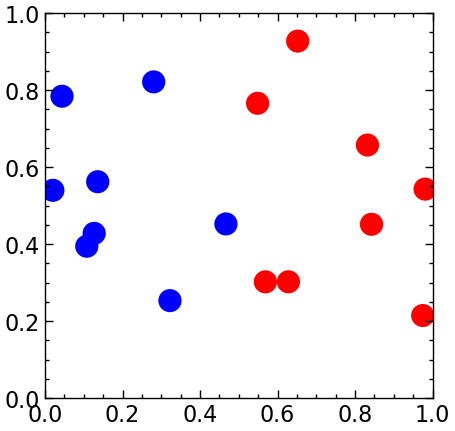

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='C0',alpha = 0.5)
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='C3',alpha = 0.5)
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

## Simulação com 500 partículas


In [33]:
n_particles = 500
r = np.random.random((2,n_particles))
ixr = r[0]>0.5 
ixl = r[0]<=0.5 
ids = np.arange(n_particles)
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))
v[0][ixr] = -500
v[0][ixl] = 500
radius = 0.0015
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

Distribuição de velocidades

* $kT = \langle K \rangle = \frac{1}{2}m\bar{v^2} \implies \boxed{\frac{m}{kT} = \frac{2}{\bar{v^2}}}$
* $\boxed{f(v) = \frac{m}{kT} v \exp\left(-\frac{m}{kT}\frac{v^2}{2} \right)}$

In [34]:
v = np.linspace(0, 2000, 1000)
a = 2/500**2
fv = a*v*np.exp(-a*v**2 / 2)

Histograma de velocidades

Text(0, 0.5, '# Particles')

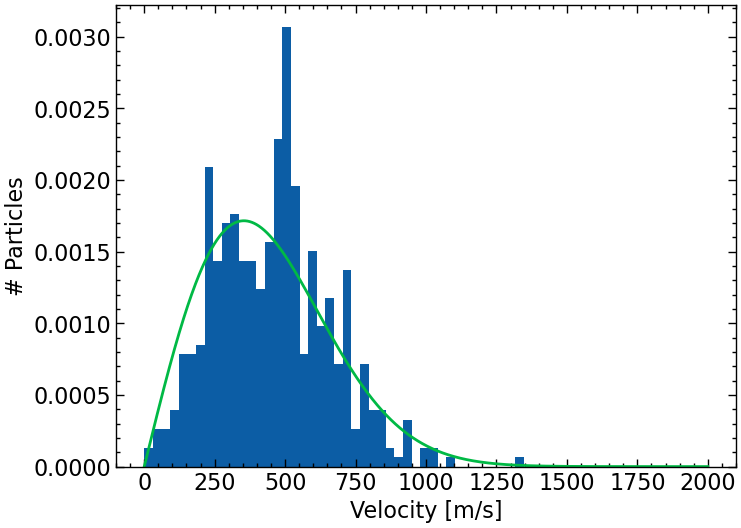

In [35]:
bins = np.linspace(0,1500,50)
plt.figure()
plt.hist(np.sqrt(np.sum(vs[400]**2, axis=0)), bins=bins, density=True)
plt.plot(v,fv)
plt.xlabel('Velocity [m/s]')
plt.ylabel('# Particles')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]
    xred, yred = rs[i][0][ixr], rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=4*radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors='C0',alpha = 0.5)
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='C3',alpha = 0.5)
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax = axes[1]
    ax.hist(np.sqrt(np.sum(vs[i]**2, axis=0)), bins=bins, density=True)
    ax.plot(v,fv)
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('# Particles')
    ax.set_xlim(0,1500)
    ax.set_ylim(0,0.006)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    fig.tight_layout()
    
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani.gif',writer='pillow',fps=30,dpi=100)